In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.shape
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


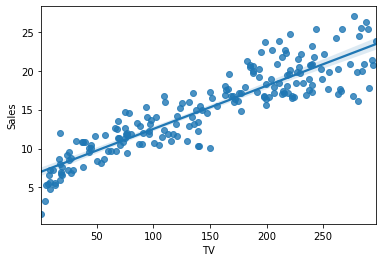

In [6]:
# visualize the data

sns.regplot(x="TV", y="Sales", data=df)
plt.show()

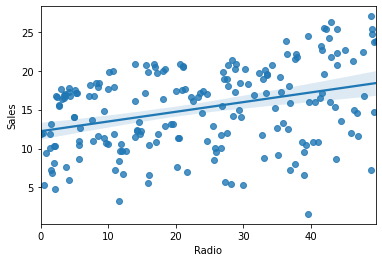

In [7]:
sns.regplot(x="Radio", y="Sales", data=df)
plt.show()

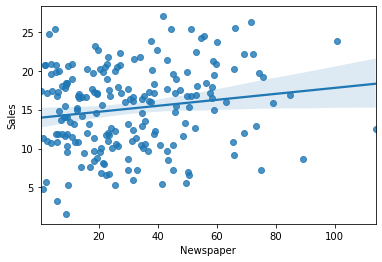

In [8]:
sns.regplot(x="Newspaper", y="Sales", data=df)
plt.show()

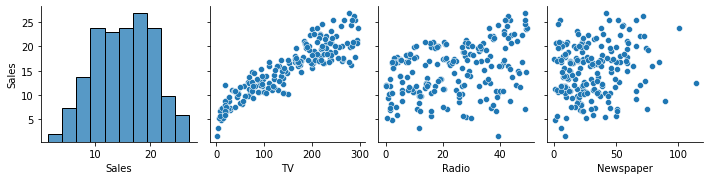

In [9]:
sns.pairplot(data = df, x_vars= ['Sales', 'TV','Radio','Newspaper'],
                        y_vars='Sales')

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


<AxesSubplot:>

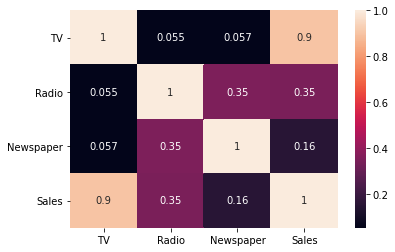

In [10]:
#heatmap
print(df.corr())

sns.heatmap(df.corr(), annot=True)


In [11]:
# We will take TV and Sales for our simple linear regression

# Using StatsModels

y = c + m1x1 + m2x2 + ... 

In [12]:
import statsmodels
import statsmodels.api as sm

import sklearn

In [13]:
#create x and y
X = df['TV']
y = df ['Sales']

In [14]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 100)
print(X_train.shape)
print(X_test.shape)

(140,)
(60,)


In [15]:
# training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [16]:
# fit the model (ordinary least squares)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

Sales = 6.94 + 0.054 TV

In [17]:
# model Details

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           1.52e-52
Time:                        13:18:17   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

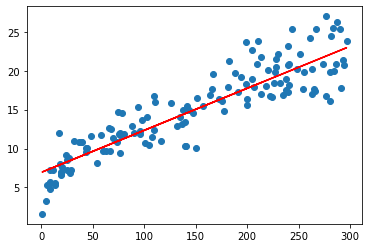

In [18]:
# plot the predictions
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487 + 0.054*X_train, 'r')

### Residual Analysis

In [19]:
# error = y_train - y_train_pred
y_train_pred =  lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [20]:
residual = y_train - y_train_pred

Text(0.5, 1.0, 'Residual Plot')

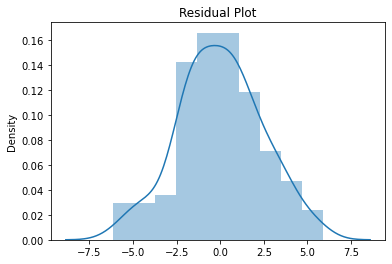

In [21]:
# plot residual
plt.figure()
sns.distplot(residual)
plt.title("Residual Plot")

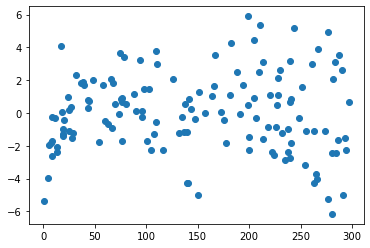

In [22]:
# Look for patterns in residuals (Ideally we shoudn't identify any)
plt.scatter(X_train, residual)
plt.show()


### Predicting on the test set

In [23]:
# predict y_test 
# Evaluate model using r-squared on the test
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

In [24]:
residual = y_test - y_test_pred
print(residual)

126   -0.774140
104    0.758518
99     2.876731
92     0.576706
111    1.667608
167   -1.028745
116   -2.341452
96    -1.026924
52     3.847616
69     3.525798
164   -1.441445
124    0.233067
182   -1.314155
154    3.407624
125   -1.105073
196    1.913107
194    2.185818
177    0.467630
163    2.133086
31    -1.206899
11    -1.259656
73    -3.006904
15     4.793077
41     0.496719
97     3.465807
128    5.734887
133    0.662160
82     0.244022
139    3.665807
123    1.536735
83     2.920387
65     0.587660
151   -1.948719
162    2.674897
170   -1.275971
77     0.678554
32     0.949470
173    0.565812
174   -2.579659
85     2.713077
168   -1.597838
112    0.567628
171    1.578540
181   -1.666930
7     -0.305083
46    -1.241437
75     0.829494
28    -1.619667
29    -0.299613
195   -1.432331
40    -1.394198
153   -0.292371
115    1.554931
64     1.900369
59    -0.041473
1      1.024031
192   -1.986870
136    1.154946
152   -1.126924
161    1.676746
dtype: float64


In [25]:
# Evaluating models using sklearn

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [26]:
# Evaluate model using r-squared on the test
r_squ = r2_score(y_true = y_test, y_pred = y_test_pred)
print(r_squ)

0.7921031601245658


In [27]:
#using mean_squared_error
mean_squared_error = mean_squared_error(y_true = y_test, y_pred = y_test_pred)
print(mean_squared_error)

4.077556371826956


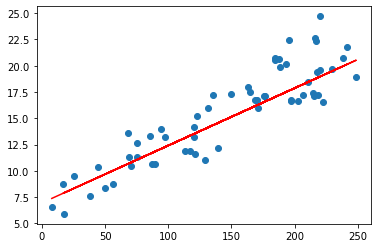

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# LR Using SKLearn

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 100)
print(X_train.shape)
print(X_test.shape)

(140,)
(60,)


In [30]:
from sklearn.linear_model import LinearRegression

#create model object
LR = LinearRegression()

In [31]:
# train the model
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)



In [34]:
LR.fit(X_train,y_train)
print("Coefficient:" , LR.coef_)
print("Intercept:" , LR.intercept_)

Coefficient: [[0.05454575]]
Intercept: [6.9486832]


In [35]:
#Make Pred
y_test_pred = LR.predict(X_test)

In [36]:
#Evaluate
r_squ = r2_score(y_true = y_test, y_pred = y_test_pred)
print(r_squ)

0.7921031601245662
